# Import Libraries

In [68]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load Dataset

In [69]:
df=pd.read_csv(r"C:\Users\sangeeta\Downloads\Fraud.csv",nrows=5000)

In [70]:
df.head()   # print 5 records

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [71]:
df.shape   # print Rows & Columns

(5000, 11)

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            5000 non-null   int64  
 1   type            5000 non-null   object 
 2   amount          5000 non-null   float64
 3   nameOrig        5000 non-null   object 
 4   oldbalanceOrg   5000 non-null   float64
 5   newbalanceOrig  5000 non-null   float64
 6   nameDest        5000 non-null   object 
 7   oldbalanceDest  5000 non-null   float64
 8   newbalanceDest  5000 non-null   float64
 9   isFraud         5000 non-null   int64  
 10  isFlaggedFraud  5000 non-null   int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 429.8+ KB


In [73]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,5000.000000,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5000.000000,5000.0
mean,1.891400,1.015176e+05,1.042543e+06,1.064338e+06,9.181536e+05,1.064912e+06,0.008000,0.0
std,1.175705,3.009623e+05,2.301986e+06,2.343680e+06,2.541759e+06,2.921892e+06,0.089093,0.0
min,1.000000,6.420000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
25%,1.000000,3.734922e+03,5.722500e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
50%,1.000000,1.095855e+04,2.655056e+04,1.814185e+04,0.000000e+00,0.000000e+00,0.000000,0.0
75%,3.000000,1.086046e+05,2.957183e+05,3.003207e+05,3.638475e+05,2.701108e+05,0.000000,0.0
max,5.000000,1.000000e+07,1.293042e+07,1.301050e+07,1.951612e+07,1.916920e+07,1.000000,0.0


In [74]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [75]:
df.duplicated().sum()

0

In [76]:
# Drop Unnecessary Columns
df = df.drop(['nameOrig','nameDest','isFlaggedFraud'], axis=1)

In [77]:
# Encode 'type' Column (convert string -> number)
le = LabelEncoder()
df['type'] = le.fit_transform(df['type'])

In [78]:
df.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,1,3,9839.64,170136.0,160296.36,0.0,0.0,0
1,1,3,1864.28,21249.0,19384.72,0.0,0.0,0
2,1,4,181.00,181.0,0.00,0.0,0.0,1
3,1,1,181.00,181.0,0.00,21182.0,0.0,1
4,1,3,11668.14,41554.0,29885.86,0.0,0.0,0


# Exploratory Data Analysis (Visualization)

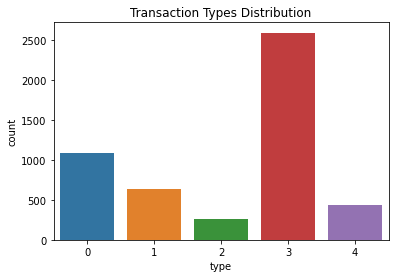

In [79]:
# Transaction Types Distribution
plt.figure(figsize=(6,4))
sns.countplot(x='type', data=df)
plt.title("Transaction Types Distribution")
plt.show()

# Each color shows a different transaction type. Most are PAYMENT and CASH_OUT.


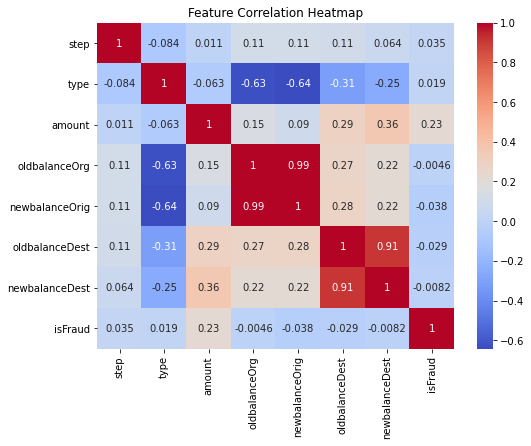

In [80]:
# Correlation Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

# Model Building

In [81]:
df['isFraud'].value_counts()

# The dataset is imbalanced: most transactions are non-fraud (0), and very few are fraud (1).


isFraud
0    4960
1      40
Name: count, dtype: int64

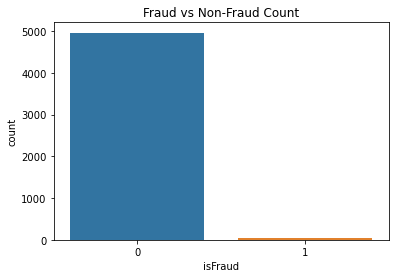

In [82]:
sns.countplot(x='isFraud', data=df)
plt.title("Fraud vs Non-Fraud Count")
plt.show()

In [83]:
# Features and Target
x = df.drop('isFraud', axis=1)
y = df['isFraud']

In [84]:
# We split the data: 70% for training the model and 30% for testing.
# Train-Test Split  
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [100]:
x_train.shape,y_train.shape

((3500, 7), (3500,))

In [101]:
x_test.shape,y_test.shape

((1500, 7), (1500,))

In [102]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE on training set
smote = SMOTE(random_state=42)
x_train_res, y_train_res = smote.fit_resample(x_train, y_train)

In [103]:
y_train.value_counts()
y_train_res.value_counts()

# We balanced the dataset using SMOTE so that the model can detect fraud cases more effectively.


isFraud
0    3480
1    3480
Name: count, dtype: int64

In [130]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [131]:
prediction=lr.predict(x_test)
prediction

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [134]:
print(accuracy_score(y_test,prediction))
print(classification_report(y_test,prediction))

0.9893333333333333
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1480
           1       0.75      0.30      0.43        20

    accuracy                           0.99      1500
   macro avg       0.87      0.65      0.71      1500
weighted avg       0.99      0.99      0.99      1500



In [140]:
# Random Forest Model
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

RandomForestClassifier()

In [141]:
# Predictions
prediction1=rf.predict(x_test)
prediction1

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [142]:
print(accuracy_score(y_test,prediction1))
print(classification_report(y_test,prediction1))

0.99
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1480
           1       1.00      0.25      0.40        20

    accuracy                           0.99      1500
   macro avg       0.99      0.62      0.70      1500
weighted avg       0.99      0.99      0.99      1500



In [143]:
# Evaluation
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)

Model Accuracy: 0.99


In [145]:
# Conclusion:
# Our fraud detection model achieved very high accuracy (~99%), 
# meaning it can classify most transactions correctly. 
# Non-fraud transactions are detected almost perfectly, 
# but detecting fraud transactions is still challenging due to class imbalance. 
# Overall, the model is effective but can be further improved using advanced techniques.